## Metodos Alterados
<br>

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

caminhos = ['spjComponentesDT', 'spjConsultas', 'spjGeral', 'spjDados'
            ,'spjComponentes', 'Classes', 'Servidor'] #, 'Cliente']

In [3]:
def Grafico(df):
    Metodos = df.NOME.value_counts().to_frame() #index #.tolist()
    #Files[:20].plot(kind='barh')
    #Files = Files.filter(like='.pas', axis=0)

    Metodos[:20].plot(kind='barh')
    plt.title("Metodos mais alterados")
    plt.show()

In [4]:
def File(df):
    df = df.assign(file=df['ARQUIVO'].str.split("/"))
    files = []
    for row in df['ARQUIVO']:
        files.append(row.split('/')[-1])
    df['FILE'] = files
    df = df.drop('ARQUIVO', axis=1)
    return df

spjComponentesDT.csv
(0, 5)
(0, 5)
spjConsultas.csv
(12268, 5)
(12268, 5)


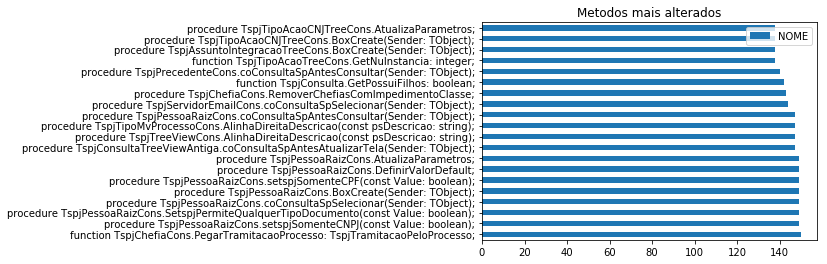

spjGeral.csv
(9228, 5)
(9228, 5)


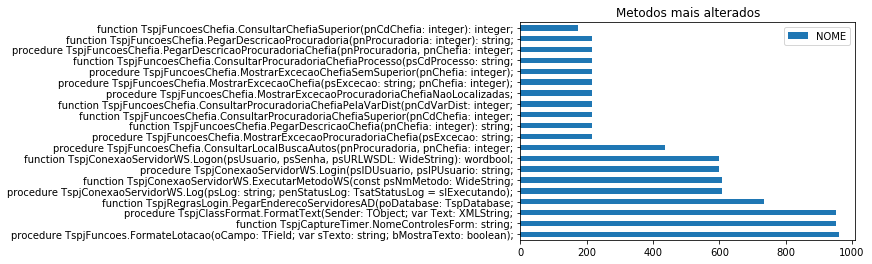

spjDados.csv
(377219, 5)
(377219, 5)


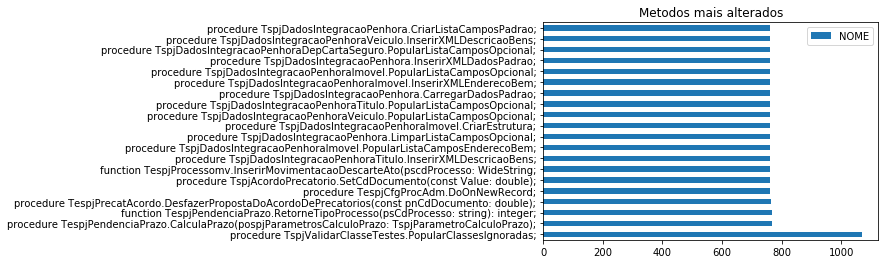

spjComponentes.csv
(119043, 5)
(119043, 5)


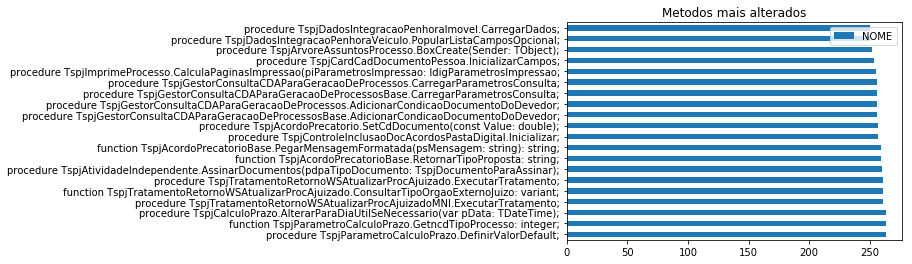

Classes.csv
(331062, 5)
(331062, 5)


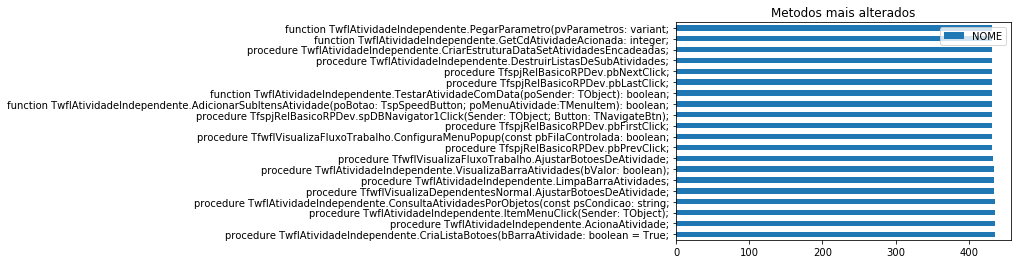

Servidor.csv
(10719038, 5)
(10719038, 5)


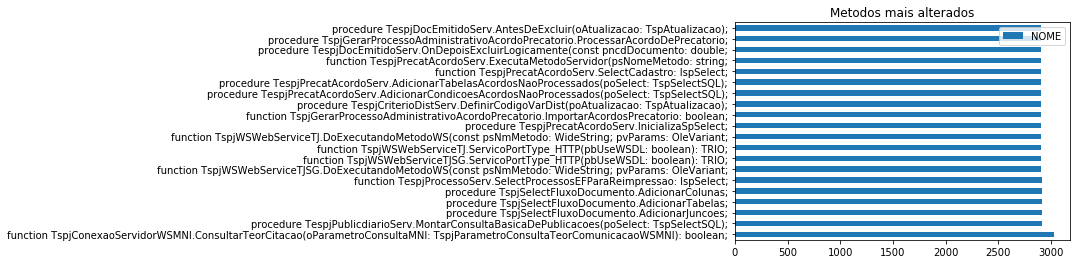

In [8]:
for caminho in caminhos:
    arquivo = caminho + '.csv'
    #if os.path.isfile(arquivo):
    #    continue
    print (arquivo)
    df = pd.read_csv(arquivo, encoding='ISO-8859-1', delimiter=',')
    print (df.shape)
    df = df.drop_duplicates()
    print (df.shape)
    df.to_csv(path_or_buf=arquivo, index=False)
    #print (df.shape[0])
    if df.shape[0] > 0:
        #df.head(10)
        df = File(df)
        Grafico(df)
df = []

In [19]:
df = pd.read_csv('Classes.csv', encoding='ISO-8859-1', delimiter=',')
#df[df.NOME == 'procedure TfspjRelBasicoRPDev.pbFirstClick;']['ARQUIVO'][327839][-30:]
df[df.NOME == 'procedure TfspjRelBasicoRPDev.pbFirstClick;']

,ARQUIVO,CHANGESET,DESENV,NOME,SALT
0,D:\UNJ\fPJ\PJ\build\main\pjDev\src\pj\Classes\...,552718,olimar.santos,procedure TfspjRelBasicoRPDev.pbFirstClick;,1/1
